
# Project: investigate a dataset about chemical compounds

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>

</ul>

<a id='intro'></a>
## Introduction
Here we have a dataset about chemical compounds. Let's see what we can get 


<html><h1> questions we will answer today ?</h1>
<p><B>(Q1) common mode of action ?   </b></p>
<p><B>(Q2) compounds and molecular weight </b></p>
<p><B>(Q3) most dangeroues chemical compounds</b></p>

</html>  


In [1]:
# importing useful libiraries for project

import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Reading our data as df
df = pd.read_excel(r'F:\Data Analysis projects\3 - investigate chemical compunds\dataSETwithdescriptors.xls')

In [3]:
# See what is our data look like in 2 rows
df.head(2)

,ID,NAME,CAS,SMILES,CODE,MW,LogP2,MOA,LC50 (mg/l),LC50 (mg/l)*,...,Min partial charge for a I atom [Zefirov's PC],Max partial charge for a Sn atom [Zefirov's PC],Min partial charge for a Sn atom [Zefirov's PC],logD pH3,logD pH5,logD pH6.5,logD pH7,logD pH7.4,logD pH9,LogP1
0,1,4-(HEXYLOXY)-M-ANISALDEHYDE,10015,c1cc(C=O)cc(OC)c1OCCCCCC,5.0,236.31,3.99,REACTIVE_4,2.67,2.669990,...,NaN,NaN,NaN,4.20,4.20,4.20,4.20,4.20,4.20,4.20
1,2,5-BROMO-2-NITROVANILLIN,10026,c1(OC)c(N(=O)=O)c(C=O)cc(Br)c1O,5.0,276.04,1.88,REACTIVE_4,73.30,73.300372,...,NaN,NaN,NaN,1.71,1.04,-0.31,-0.71,-0.95,-1.23,1.73


need to know types and shapes 

In [4]:
# dtypes, shapes  to examine the entire data 

df.dtypes , "df shape is" , df.shape
      

(ID              int64
 NAME           object
 CAS             int64
 SMILES         object
 CODE          float64
                ...   
 logD pH6.5    float64
 logD pH7      float64
 logD pH7.4    float64
 logD pH9      float64
 LogP1         float64
 Length: 204, dtype: object,
 'df shape is',
 (568, 204))

More info about my DF to see if i can get some questions from there

In [5]:
# info to examine the entire data
df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Columns: 204 entries, ID to LogP1
dtypes: float64(162), int64(37), object(5)
memory usage: 905.4+ KB


In [6]:
# describe to examine the entire data
df.describe()

,ID,CAS,CODE,MW,LC50 (mg/l),LC50 (mg/l)*,LC50 (mmol/l),-logLC50,Class CE,Total Energy (kcal/mol),...,Min partial charge for a I atom [Zefirov's PC],Max partial charge for a Sn atom [Zefirov's PC],Min partial charge for a Sn atom [Zefirov's PC],logD pH3,logD pH5,logD pH6.5,logD pH7,logD pH7.4,logD pH9,LogP1
count,568.000000,5.680000e+02,568.000000,568.000000,568.000000,568.000000,5.680000e+02,568.000000,568.000000,568.000000,...,3.000000,2.000000,2.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,307.056338,3.372920e+06,9.869014,165.319331,1033.913644,1027.541829,1.094003e+01,0.835918,2.774648,-41823.708049,...,-0.004963,0.110650,0.110650,1.688204,1.789595,1.780546,1.773398,1.770106,1.758680,2.189137
std,175.309272,1.053404e+07,5.482776,73.159565,5656.148767,5645.054626,6.301471e+01,1.383966,1.007166,17473.479198,...,0.003892,0.000778,0.000778,2.200976,2.138216,2.073581,2.035227,1.998505,1.882534,1.612645
min,1.000000,1.001500e+04,1.000000,32.040000,0.000190,0.000190,4.209127e-07,-2.962655,1.000000,-130310.033775,...,-0.007706,0.110100,0.110100,-7.470000,-7.390000,-6.870000,-6.490000,-6.830000,-7.290000,-2.270000
25%,156.750000,1.016285e+05,5.000000,117.902500,3.787500,3.744981,1.922923e-02,-0.018914,2.000000,-50436.264132,...,-0.007191,0.110375,0.110375,0.620000,0.817500,0.810000,0.817500,0.737500,0.667500,1.220000
50%,304.500000,1.338710e+05,9.000000,151.170000,21.750000,21.501540,1.440344e-01,0.841534,3.000000,-38696.262351,...,-0.006675,0.110650,0.110650,1.885000,1.940000,1.950000,1.940000,1.935000,1.815000,2.085000
75%,459.250000,1.127432e+06,14.000000,198.160000,136.000000,135.248308,1.044550e+00,1.716069,4.000000,-29974.795995,...,-0.003592,0.110925,0.110925,3.042500,3.042500,3.025000,3.000000,2.970000,2.932500,3.160000
max,617.000000,1.018369e+08,24.000000,488.620000,75200.000000,75200.000000,9.176030e+02,6.375808,4.000000,-10257.182876,...,-0.000508,0.111200,0.111200,9.900000,9.900000,9.900000,9.900000,9.900000,9.900000,9.900000




### Data Cleaning 


we decided to make analysis at first 12 column 
so i will delete every single column after column[12] 

In [7]:
# head of our first row in data 
df.head(1)

,ID,NAME,CAS,SMILES,CODE,MW,LogP2,MOA,LC50 (mg/l),LC50 (mg/l)*,...,Min partial charge for a I atom [Zefirov's PC],Max partial charge for a Sn atom [Zefirov's PC],Min partial charge for a Sn atom [Zefirov's PC],logD pH3,logD pH5,logD pH6.5,logD pH7,logD pH7.4,logD pH9,LogP1
0,1,4-(HEXYLOXY)-M-ANISALDEHYDE,10015,c1cc(C=O)cc(OC)c1OCCCCCC,5.0,236.31,3.99,REACTIVE_4,2.67,2.66999,...,NaN,NaN,NaN,4.2,4.2,4.2,4.2,4.2,4.2,4.2


In [8]:
# get shape of data 
print('rows , columns = ', df.shape)

rows , columns =  (568, 204)


In [9]:
# loop for deleting last 192 column

repeat_it = 192
while repeat_it != 0 : 
    
    df.drop(df.columns[12],axis=1, inplace=True)

    # incrase repeatit by 1
    repeat_it -= 1 # 192 = 192 - 1 
    
else : 
    pass
    

delete CODE column

In [10]:
df.drop('CODE', axis=1, inplace=True)

In [11]:
print('rows , columns = ', df.shape)

rows , columns =  (568, 11)


In [12]:
print(' now data look like this', end = '\n')
df.head()

 now data look like this


,ID,NAME,CAS,SMILES,MW,LogP2,MOA,LC50 (mg/l),LC50 (mg/l)*,LC50 (mmol/l),-logLC50
0,1,4-(HEXYLOXY)-M-ANISALDEHYDE,10015,c1cc(C=O)cc(OC)c1OCCCCCC,236.31,3.99,REACTIVE_4,2.67,2.669990,0.011299,1.946971
1,2,5-BROMO-2-NITROVANILLIN,10026,c1(OC)c(N(=O)=O)c(C=O)cc(Br)c1O,276.04,1.88,REACTIVE_4,73.30,73.300372,0.265541,0.575868
2,4,P-CHLOROPHENYL-O-NITROPHENYL ETHER,10048,c1cc(Cl)ccc1Oc2c(N(=O)=O)cccc2,249.65,4.79,NARCOSIS_I_2,1.92,1.920017,0.007691,2.114030
3,5,3'-CHLORO-O-FORMOTOLUIDIDE,10059,Cc1c(NC=O)cccc1Cl,169.61,2.27,NARCOSIS_I_3,46.60,46.600055,0.274748,0.561066
4,6,DI-n-BUTYLISOPHTHALATE,10060,CCCCOC(=O)c1cccc(C(=O)OCCCC)c1,278.35,5.53,NARCOSIS_I_2,0.90,0.899987,0.003233,2.490349


check if there is duplicated rows ?


In [13]:
print('duplicatid rows = ' , df.duplicated().sum())

duplicatid rows =  0


check if there is duplicated values in each column

In [14]:
# looping at every column 
for column_name in df : 
    print(f'sum of duplicatid values in {column_name} =  ' , df[column_name].duplicated().sum())


sum of duplicatid values in ID =   0
sum of duplicatid values in NAME =   0
sum of duplicatid values in CAS =   0
sum of duplicatid values in SMILES =   1
sum of duplicatid values in MW =   143
sum of duplicatid values in LogP2 =   200
sum of duplicatid values in MOA =   533
sum of duplicatid values in LC50 (mg/l) =   71
sum of duplicatid values in LC50 (mg/l)* =   0
sum of duplicatid values in LC50 (mmol/l) =   0
sum of duplicatid values in -logLC50 =   0


we get info and describes for data after cleaning columns

In [15]:
# describe to examine the intire data 
df.describe()

,ID,CAS,MW,LC50 (mg/l),LC50 (mg/l)*,LC50 (mmol/l),-logLC50
count,568.000000,5.680000e+02,568.000000,568.000000,568.000000,5.680000e+02,568.000000
mean,307.056338,3.372920e+06,165.319331,1033.913644,1027.541829,1.094003e+01,0.835918
std,175.309272,1.053404e+07,73.159565,5656.148767,5645.054626,6.301471e+01,1.383966
min,1.000000,1.001500e+04,32.040000,0.000190,0.000190,4.209127e-07,-2.962655
25%,156.750000,1.016285e+05,117.902500,3.787500,3.744981,1.922923e-02,-0.018914
50%,304.500000,1.338710e+05,151.170000,21.750000,21.501540,1.440344e-01,0.841534
75%,459.250000,1.127432e+06,198.160000,136.000000,135.248308,1.044550e+00,1.716069
max,617.000000,1.018369e+08,488.620000,75200.000000,75200.000000,9.176030e+02,6.375808


In [16]:
# info about null values and types
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             568 non-null    int64  
 1   NAME           568 non-null    object 
 2   CAS            568 non-null    int64  
 3   SMILES         568 non-null    object 
 4   MW             568 non-null    float64
 5   LogP2          568 non-null    object 
 6   MOA            568 non-null    object 
 7   LC50 (mg/l)    568 non-null    float64
 8   LC50 (mg/l)*   568 non-null    float64
 9   LC50 (mmol/l)  568 non-null    float64
 10  -logLC50       568 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 48.9+ KB


change type some columns

In [17]:
# function for dry
def change_type(column_name, column_type) : 
    """ 
    changing types using this code
    just type column name
    and type the type (str / float / int )
    df[columnname].astype(str)
    
    """
    df[column_name] = df[column_name].astype(column_type)

change_type('SMILES',str)
change_type('NAME',str)
change_type('LogP2',str)
change_type('MOA',str)


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (common mode of action ? )

most common 3 MOA is: 

NARCOSIS_I_2    111
NARCOSIS_I_3     94
MIXED            44
Name: MOA, dtype: int64


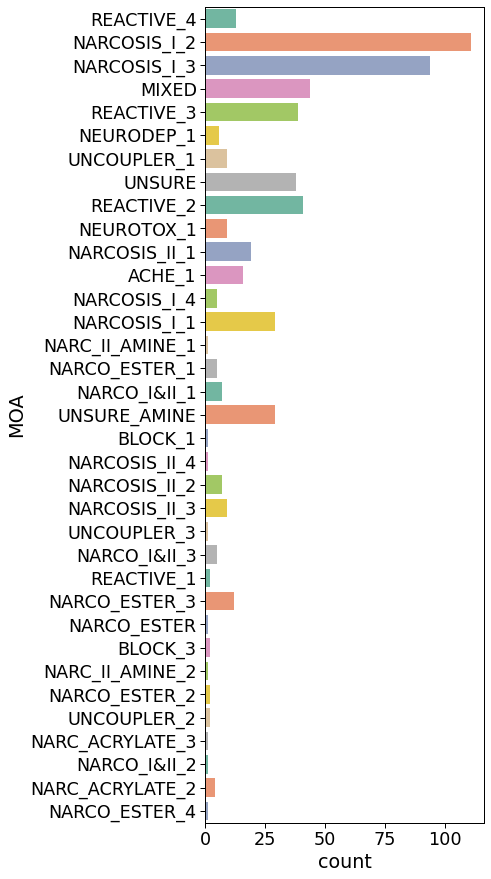

In [18]:
plt.figure(figsize = (5, 15))
sns.set_context('paper', font_scale=2)
sns.countplot(y = 'MOA', data = df, palette='Set2');

# get max 3 repeated values 
print('most common 3 MOA is: \n',df.MOA.value_counts().head(3), sep='\n')
plt.show()



### Research Question 2 ( compounds and molecular weight?)


 Create a new data frame have largest 10 values by MW


In [19]:
df_mW = df.sort_values(by=['MW']).nlargest(columns='MW',n=10)
df_mW.head()


,ID,NAME,CAS,SMILES,MW,LogP2,MOA,LC50 (mg/l),LC50 (mg/l)*,LC50 (mmol/l),-logLC50
360,389,PENTABROMOPHENOL,608719,Oc1c(Br)c(Br)c(Br)c(Br)c1Br,488.62,4.69,UNCOUPLER_2,0.09300,0.092995,1.903320e-04,3.720488
361,390,"2,4,6-TRIIODOPHENOL",609234,Oc1c(I)cc(I)cc1I,471.80,4.8,NARCOSIS_I_3,1.21000,1.210006,2.564646e-03,2.590973
565,614,FLUCYTHRINATE,70124775,CC(C)C(C(=O)OC(C#N)c2cccc(Oc1ccccc1)c2)c3ccc(O...,451.40,6.2,NEUROTOX_1,0.00019,0.000190,4.209127e-07,6.375808
526,567,"A,A,A',A'-TETRABROMO-O-XYLENE",13209159,BrC(Br)c1c(C(Br)Br)cccc1,421.77,5.17,REACTIVE_4,0.43700,0.436981,1.036110e-03,2.984594
557,604,FENVALERATE #1 (PYDRIN),51630581,c1cc(Cl)ccc1C(C(C)C)C(=O)OC(C#N)c2cccc(Oc3cccc...,419.93,6.2,NEUROTOX_1,0.00510,0.005100,1.214488e-05,4.915607


most 10 compunds weight 



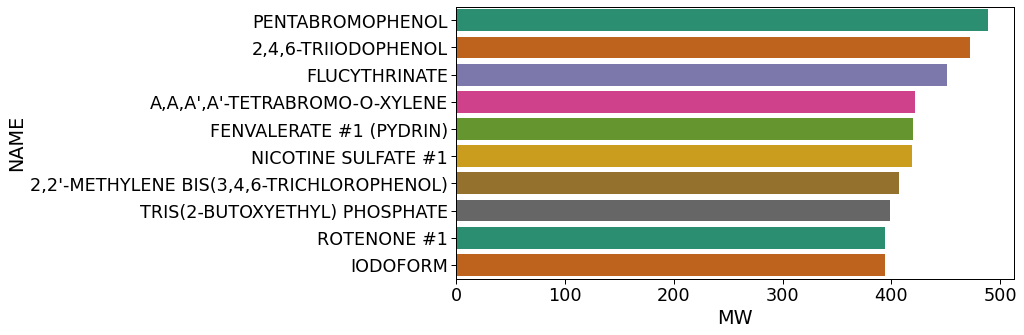

In [20]:
print('most 10 compunds weight \n')
plt.figure(figsize = (10, 5))

sns.barplot(data=df_mW, y = 'NAME', x = 'MW', palette = 'Dark2' );

### Research Question 2 ( most dangeroues chemical compounds? )


Create a new data frame have smallest 10 values by -logLC50


In [21]:
df_lc50 = df.sort_values(by=['-logLC50']).nsmallest(columns='-logLC50',n=10)
df_lc50.head()

,ID,NAME,CAS,SMILES,MW,LogP2,MOA,LC50 (mg/l),LC50 (mg/l)*,LC50 (mmol/l),-logLC50
33,41,METHANOL-RHODAMINE B,67561,CO,32.04,-0.77,NARCOSIS_I_2,29400.0,29401.468165,917.602996,-2.962655
226,243,2-HYDROXYETHYL ETHER,111466,OCCOCCO,106.12,-1.3,NARCOSIS_I_2,75200.0,75200.000000,708.631738,-2.850421
225,242,DIETHANOLAMINE,111422,OCCNCCO,105.14,-1.43,NARCOSIS_I_3,47100.0,47098.163306,447.974130,-2.651253
37,45,METHYL SULFOXIDE,67685,CS(=O)C,78.13,-1.35,NARCOSIS_I_3,34000.0,33999.303725,435.172149,-2.638661
238,255,TRIETHYLENE GLYCOL #1,112276,OCCOCCOCCO,150.17,-1.24,NARCOSIS_I_2,59900.0,59901.076979,398.881268,-2.600844


most dangerous 10 compunds  



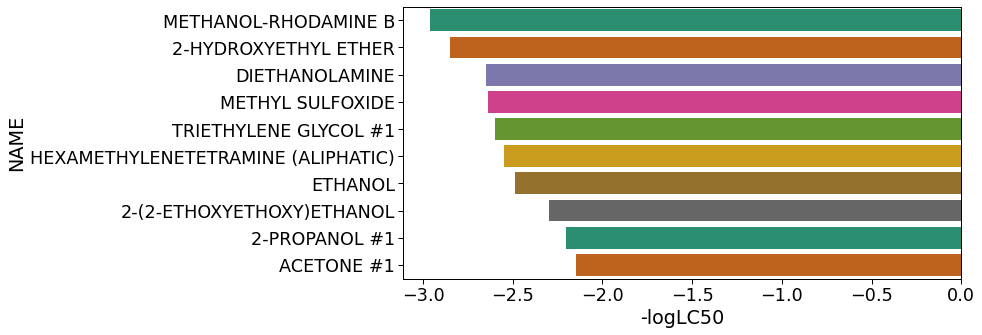

In [22]:
print('most dangerous 10 compunds  \n')
plt.figure(figsize = (10, 5))
sns.barplot(data=df_lc50, y = 'NAME', x = '-logLC50', palette = 'Dark2' );